## Arboles de Decision

Estudiante: Karen Natalia Martinez Romero,
Grupo: 86

In [170]:
"""
1 - fixed acidity: acidez fija
2 - volatile acidity: acidez volátil
3 - citric acid: ácido cítrico
4 - residual sugar: azúcar residual
5 - chlorides: cloruros
6 - free sulfur dioxide: dióxido de azufre libre
7 - total sulfur dioxide: dióxido de azufre total
8 - density: densidad
9 - pH: pH
10 - sulphates: sulfatos
11 - alcohol: alcohol
"""


# Importamos las librerías
import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y el análisis de datos
import seaborn as sns  # Creación de gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones

from sklearn import metrics  # Métricas para evaluar el rendimiento de modelos
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Clasificador y visualización de árbol de decisión
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Cálculo de métricas de evaluación del modelo
from sklearn.metrics import classification_report, accuracy_score


In [28]:
# Cargar los datos
data = pd.read_csv(r'D:\Ingenieria de sistemas\Semestre 7\ANÁLISIS DE DATOS\Tarea 3\winequality_red.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [30]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='fixed acidity', ylabel='pH'>

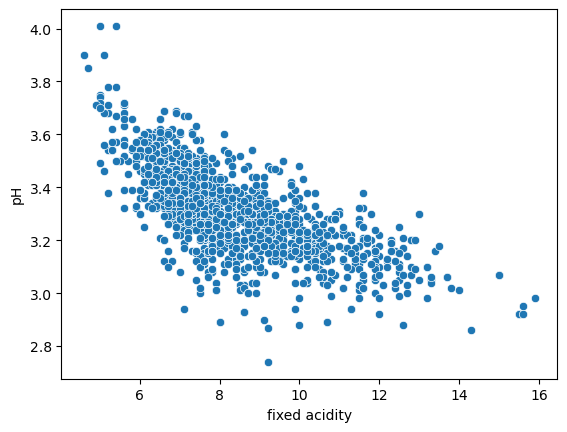

In [34]:
sns.scatterplot(x="fixed acidity", y="pH", data=data)

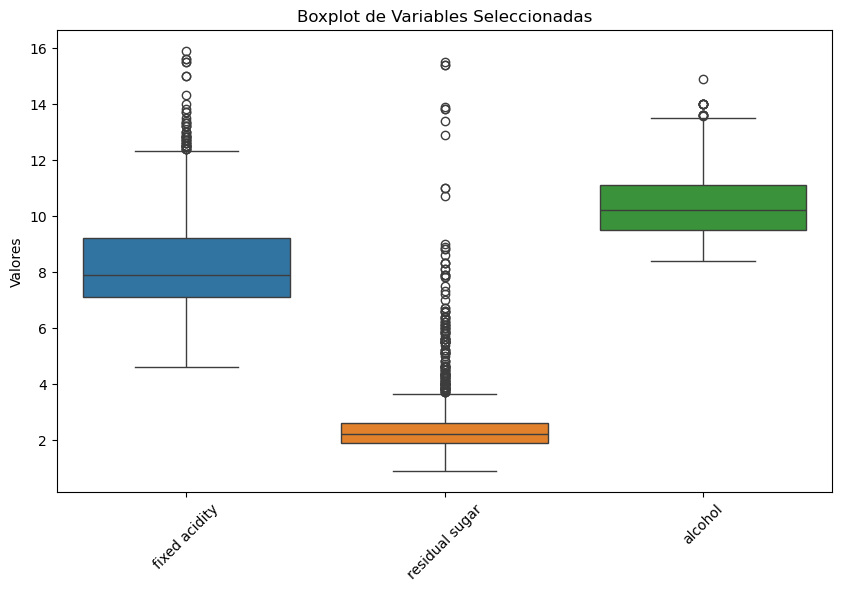

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'residual sugar', 'alcohol']])
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Seleccionadas")
plt.ylabel("Valores")
plt.show()

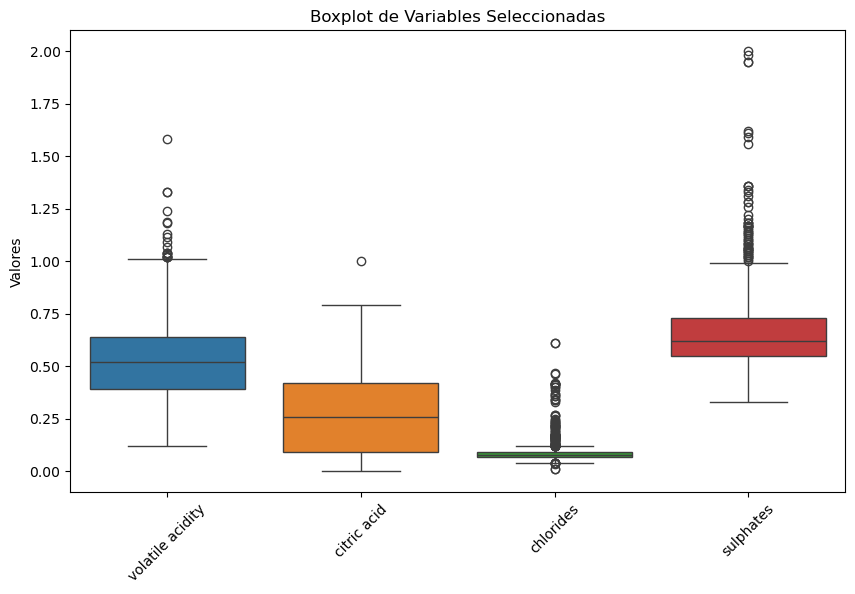

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']])
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Seleccionadas")
plt.ylabel("Valores")
plt.show()

In [56]:
# Crear un diccionario para almacenar los límites de valores atípicos para cada variable
outlier_limits = {}

# Lista de variables numéricas que deseas analizar
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol']

# Calcular límites de valores atípicos para cada variable
for var in variables:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outlier_limits[var] = (lower_limit, upper_limit)
    print(f"{var}: Límite inferior = {lower_limit}, Límite superior = {upper_limit}")

fixed acidity: Límite inferior = 3.95, Límite superior = 12.349999999999998
volatile acidity: Límite inferior = 0.015000000000000013, Límite superior = 1.0150000000000001
citric acid: Límite inferior = -0.4049999999999999, Límite superior = 0.9149999999999999
residual sugar: Límite inferior = 0.8499999999999996, Límite superior = 3.6500000000000004
chlorides: Límite inferior = 0.04000000000000002, Límite superior = 0.11999999999999998
sulphates: Límite inferior = 0.28000000000000014, Límite superior = 0.9999999999999999
alcohol: Límite inferior = 7.1000000000000005, Límite superior = 13.5
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   

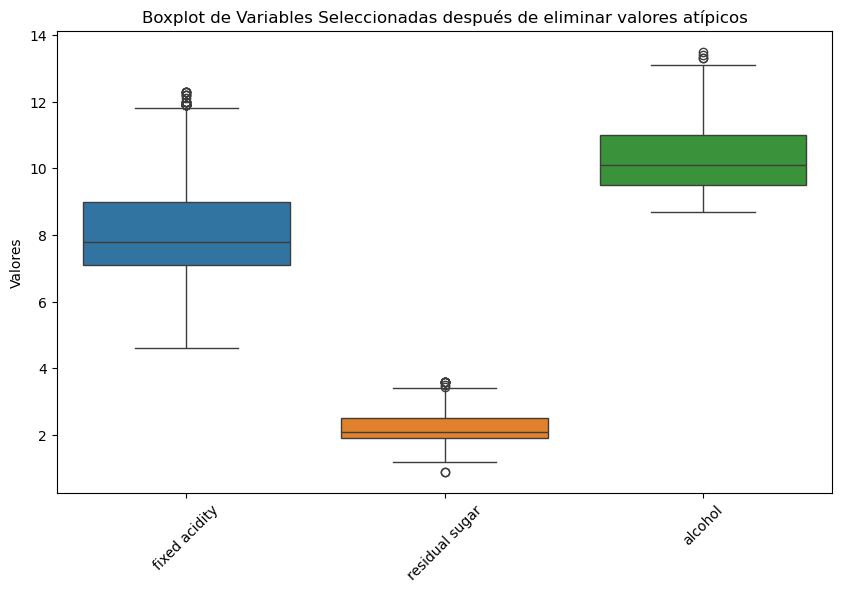

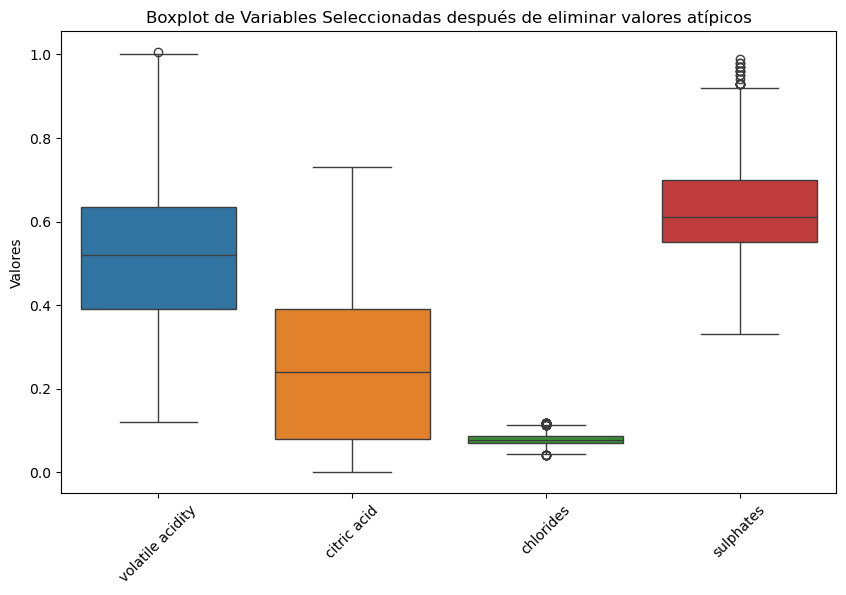

In [62]:
# Crear una copia del DataFrame para mantener los datos originales
data = data.copy()

# Filtrar los valores atípicos
for var in variables:
    lower_limit, upper_limit = outlier_limits[var]
    data = data[(data_filtered[var] >= lower_limit) & (data[var] <= upper_limit)]

# Mostrar el DataFrame filtrado con los boxplots para ver los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'residual sugar', 'alcohol']])
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Seleccionadas después de eliminar valores atípicos")
plt.ylabel("Valores")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']])
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Seleccionadas después de eliminar valores atípicos")
plt.ylabel("Valores")
plt.show()

In [64]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,8.139605,0.523534,0.247866,2.179565,0.078429,15.715810,44.977866,0.996532,3.326498,0.630814,10.381845,5.632411
std,1.475487,0.165769,0.179643,0.445049,0.014444,9.711669,30.200377,0.001663,0.143094,0.116937,0.999516,0.764145
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.880000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,23.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,14.000000,37.000000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.390000,2.500000,0.087000,21.000000,60.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,57.000000,165.000000,1.001000,4.010000,0.990000,13.500000,8.000000


<Axes: xlabel='fixed acidity', ylabel='pH'>

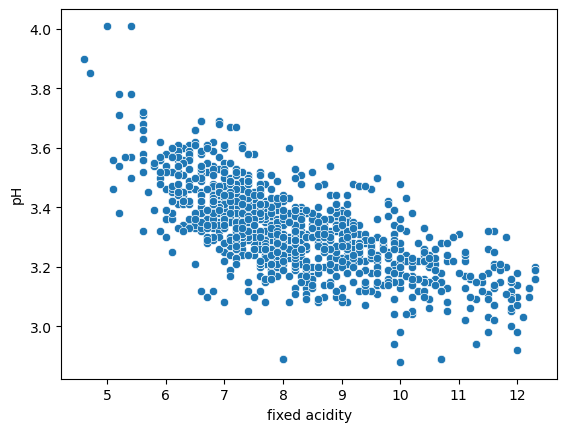

In [66]:
sns.scatterplot(x="fixed acidity", y="pH", data=data)

In [72]:
#Dividir los predictors y la variable objetivo

predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = ["quality"]

predictors = data[predictors_col]
target = data[target_col]


In [78]:
#Obtener las correlaciones, para entender el comportamiento
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.258460,0.655668,0.240082,0.213561,-0.119772,-0.066176,0.614238,-0.679078,0.155011,-0.090633
volatile acidity,-0.258460,1.000000,-0.613763,0.037754,0.123626,-0.034139,0.095766,0.060872,0.222591,-0.313461,-0.217380
citric acid,0.655668,-0.613763,1.000000,0.148583,0.088397,-0.033839,0.043202,0.296471,-0.480296,0.245798,0.106756
residual sugar,0.240082,0.037754,0.148583,1.000000,0.250573,0.064569,0.153895,0.424630,-0.045971,0.065695,0.051945
chlorides,0.213561,0.123626,0.088397,0.250573,1.000000,0.014067,0.163807,0.431786,-0.187826,-0.067748,-0.319622
free sulfur dioxide,-0.119772,-0.034139,-0.033839,0.064569,0.014067,1.000000,0.639898,-0.032920,0.092784,0.091366,-0.017315
total sulfur dioxide,-0.066176,0.095766,0.043202,0.153895,0.163807,0.639898,1.000000,0.113907,-0.040013,-0.084854,-0.229354
density,0.614238,0.060872,0.296471,0.424630,0.431786,-0.032920,0.113907,1.000000,-0.222871,0.094791,-0.570226
pH,-0.679078,0.222591,-0.480296,-0.045971,-0.187826,0.092784,-0.040013,-0.222871,1.000000,0.047385,0.172101
sulphates,0.155011,-0.313461,0.245798,0.065695,-0.067748,0.091366,-0.084854,0.094791,0.047385,1.000000,0.251775


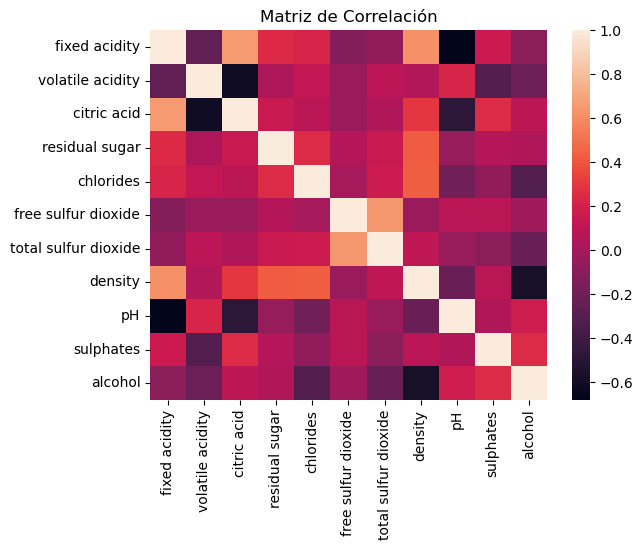

In [80]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

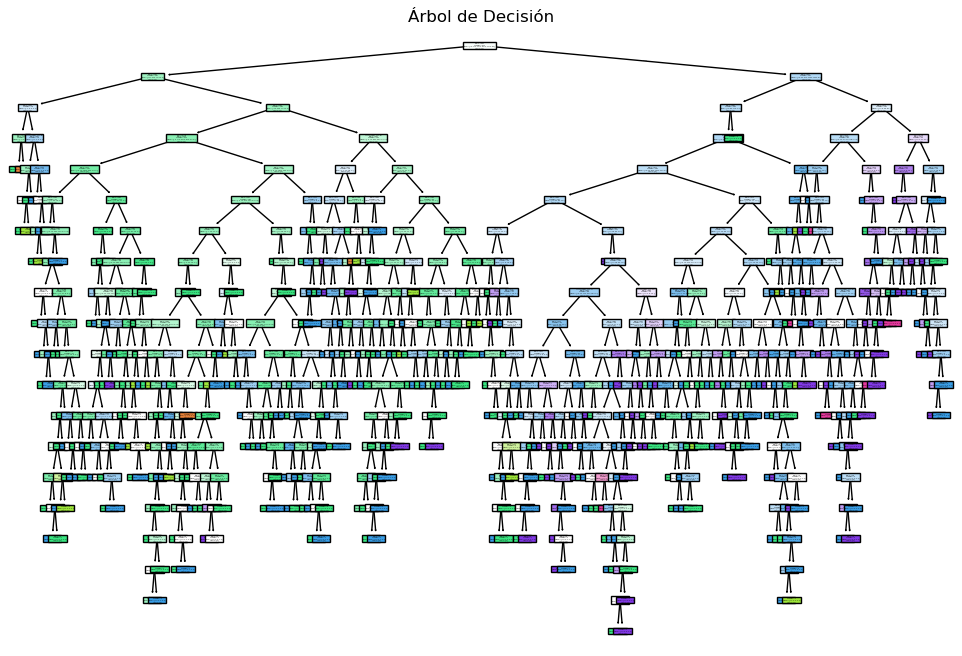

In [153]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

# Crear el clasificador de árbol de decisión
tree = DecisionTreeClassifier()

# Entrenar el modelo de árbol de decisión con los datos de entrenamiento
arbol = tree.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=True)
plt.title("Árbol de Decisión")
plt.show()

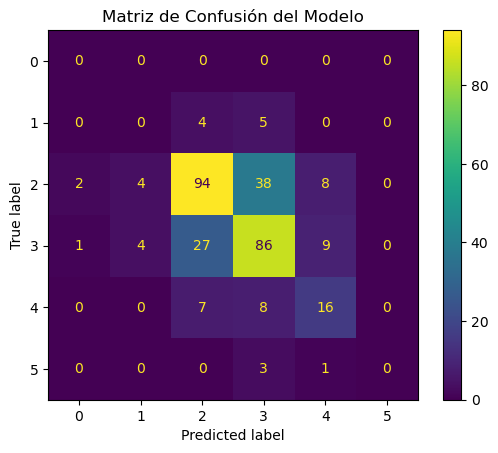

In [155]:
# Generar las predicciones del modelo
predicciones = arbol.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión del Modelo")
plt.show()

In [172]:
# Generar las predicciones en el conjunto de prueba
predicciones = arbol.predict(X_test)

# Imprimir el accuracy del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

# Generar el reporte de clasificación con precisión, recall y F1-score
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

Exactitud (Accuracy): 0.59

Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.65      0.73      0.69       146
           6       0.53      0.58      0.55       127
           7       0.47      0.23      0.30        31
           8       0.00      0.00      0.00         4

    accuracy                           0.59       317
   macro avg       0.33      0.31      0.31       317
weighted avg       0.56      0.59      0.57       317



C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


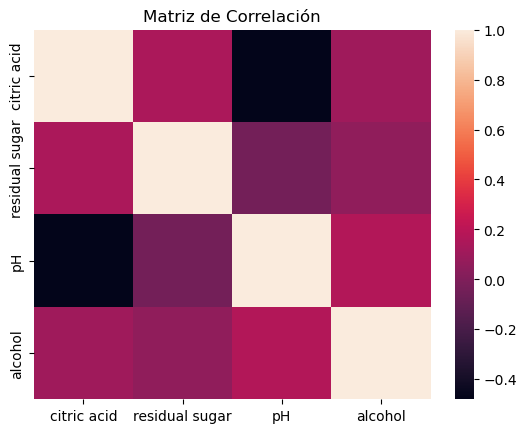

In [208]:
#Dividir los predictors y la variable objetivo

predictors_col = ["citric acid", "residual sugar", "pH","alcohol"]
target_col = ["quality"]

predictors = data[predictors_col]
target = data[target_col]

#Obtener las correlaciones, para entender el comportamiento
corr = predictors.corr()

sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

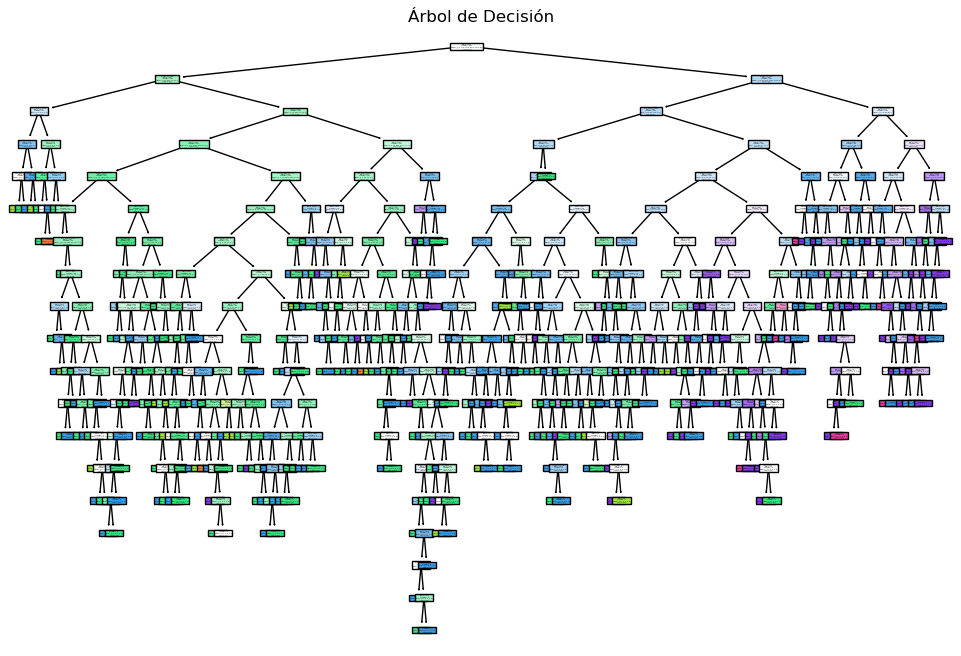

In [218]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

# Crear el clasificador de árbol de decisión
tree = DecisionTreeClassifier()

# Entrenar el modelo de árbol de decisión con los datos de entrenamiento
arbol = tree.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=True)
plt.title("Árbol de Decisión")
plt.show()

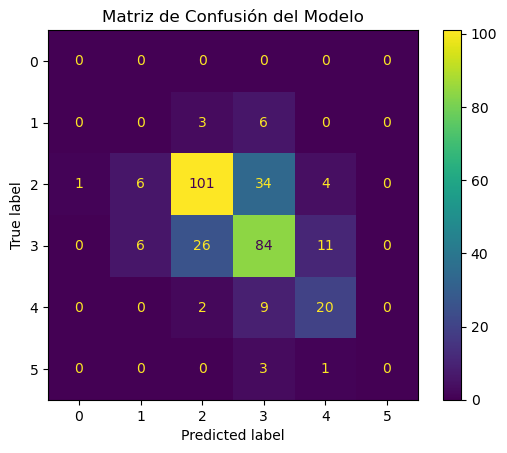

In [219]:
# Generar las predicciones del modelo
predicciones = arbol.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión del Modelo")
plt.show()

In [224]:
# Generar las predicciones en el conjunto de prueba
predicciones = arbol.predict(X_test)

# Imprimir el accuracy del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

# Generar el reporte de clasificación con precisión, recall y F1-score
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

Exactitud (Accuracy): 0.65

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.77      0.69      0.73       146
           6       0.62      0.66      0.64       127
           7       0.56      0.65      0.60        31
           8       0.00      0.00      0.00         4

    accuracy                           0.65       317
   macro avg       0.32      0.33      0.33       317
weighted avg       0.65      0.65      0.65       317



C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knata\anaconda3\Lib\site-packages\sklea